## Comparing Python to C++ speed

In [7]:
import numpy as np
import matplotlib.pyplot as plt

N = 20
R = 7
sigma = 0.7
mu = 1
u_th = 0.98

dt = 0.01

u = np.random.rand(N)*u_th
circles = np.zeros(N)

t = 0
time_max = 1000


while t < time_max:
    for i in range(N):
        u[i] = u[i] + dt*(mu - u[i])
        coupling = 0 # R <= N/2.
        if i-R < 0:
            for j in range((i-R)%N,N):
                coupling = coupling + sigma*(u[i]-u[j])/(2*R)

            for j in range(i+R+1):
                coupling = coupling + sigma*(u[i]-u[j])/(2*R)

            u[i] = u[i] + dt*coupling
        elif i+R > N-1:
            for j in range(i-R,N):
                coupling = coupling + sigma*(u[i]-u[j])/(2*R)

            for j in range((i+R)%N+1):
                coupling = coupling + sigma*(u[i]-u[j])/(2*R)

            u[i] = u[i] + dt*coupling
        else: 
            for j in range(i-R,i+R+1):
                coupling = coupling + sigma*(u[i]-u[j])/(2*R)

            u[i] = u[i] + dt*coupling

        if u[i] > u_th:
            u[i] = 0
            circles[i] += 1
        
    t = t + dt

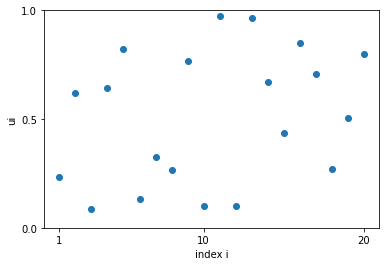

In [2]:
plt.scatter(range(1,N+1), u)
plt.ylim([0, 1])
plt.yticks([0, 0.5, 1])
plt.ylabel("ui")
plt.xticks([1, N/2, N])
plt.xlabel("index i")
plt.show()

The execution times of the same code, with exactly the same parameters, in Python and C++:
- Python: 19.1 s
- C++: 0.7 s

This is equivalent to $ \approx 96\%$ reduction in the execution time!